In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from pprint import pprint

from FSSLibrary import FFTBasic as fft
import skyboxdatapy as skb

## Function to plot and format spectrum 

In [2]:
def getSpec(wg, fs, ax, xlim, lbl, fRef=1):    
    fHalf, fAmp, fS = skb.spec.get_single_sided_spectrum(wg, fs)

    
    ax.plot(fHalf/fRef, fAmp, label=lbl)
    ax.set_xlabel("Frequency f/fRef")
    ax.set_ylabel("Amplitude (mm)")
    ax.set_title("Single-Sided FFT")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()
    ax.set_xlim(xlim)
    # plt.show()

    return fHalf, fAmp, fS


## Load the case

In [3]:
data_folder = "/home/shagun/Acads/SkyBox/ExpData/data_nosync"
testName = "Test470"

file = skb.io.find_unique_file(data_folder, testName, ext="mat")
print(f"Processing file: {file}")

# loaded_mat = skb.io.load_hdf5_mat(file)
loaded_mat = skb.io.load_case(file)

fSampling = loaded_mat['TestProperties']['fSampling']

Processing file: /home/shagun/Acads/SkyBox/ExpData/data_nosync/d1023/Measure_MAT/Test470_PLT712_d50_FC52_H127_FCL0960_R01.mat

=== Reading MAT ===
Top-level keys: ['ConversionFactor', 'ConversionOffset', 'DefaultData', 'MP3Filtered', 'MP3RawValue', 'MP3Voltage', 'TestProperties']
=== Successfully loaded using hdf5storage ===



## Test Properties

In [4]:
skb.utils.print_test_properties(loaded_mat)


=== Test Properties ===
   - testName: Test470
   - testType: PLT712
   - repeatType: R1
   - useTest: nan
   - fSampling: 2000.0
   - calibrationFile: Test_d1023_Calib
   - depthAtWM: 0.506
   - depthAtMPL: 0.473
   - airGapAtMPL: 0.239
   - waveType: FC52
   - waveAmplitude: 0.127
   - wavePeriod: nan
   - focusingLocation: 9.6
   - remarks: GP1, GP2, GP3, Shagun, LIGHT
=== End of Test Properties ===



## List all headers in the dict

In [5]:
skb.utils.print_all_headers(loaded_mat)            


=== Listing headers ===
Top-level keys: ['ConversionFactor', 'ConversionOffset', 'DefaultData', 'MP3Filtered', 'MP3RawValue', 'MP3Voltage', 'TestProperties']

Top-level: ConversionFactor -> type: <class 'dict'>
   - WG01
   - WG02
   - WG03
   - WG04
   - WG05
   - WG06
   - WG07
   - WG08
   - WG09
   - WM
   - Mo01
   - Mo02
   - Mo03
   - Mo04
   - Mo05
   - Mo06
   - Mo07
   - Mo08
   - L1
   - L2
   - L3
-----

Top-level: ConversionOffset -> type: <class 'dict'>
   - WG01
   - WG02
   - WG03
   - WG04
   - WG05
   - WG06
   - WG07
   - WG08
   - WG09
   - WM
   - Mo01
   - Mo02
   - Mo03
   - Mo04
   - Mo05
   - Mo06
   - Mo07
   - Mo08
   - L1
   - L2
   - L3
-----

Top-level: DefaultData -> type: <class 'xarray.core.dataset.Dataset'>
KeysView(<xarray.Dataset> Size: 43MB
Dimensions:      (Time: 235257)
Coordinates:
  * Time         (Time) float64 2MB 0.0 0.06051 0.06101 ... 117.7 117.7 117.7
Data variables: (12/22)
    WG01         (Time) float64 2MB -94.42 -94.46 -94.45 ... -88

## Extract Default Dataset

In [ ]:
ds = loaded_mat["DefaultData"]

# Sometimes need to skip initial data.
# Skip first 10 indexes
ds = ds.isel(Time=slice(10, None))


skb.utils.print_top_headers(ds)


=== Listing headers ===
Object type: <class 'xarray.core.dataset.Dataset'>
KeysView(<xarray.Dataset> Size: 43MB
Dimensions:      (Time: 235257)
Coordinates:
  * Time         (Time) float64 2MB 0.0 0.06051 0.06101 ... 117.7 117.7 117.7
Data variables: (12/22)
    WG01         (Time) float64 2MB -94.42 -94.46 -94.45 ... -88.97 -88.99
    WG02         (Time) float64 2MB -94.67 -94.84 -94.89 ... -101.9 -101.9
    WG03         (Time) float64 2MB -95.22 -95.22 -95.2 ... -95.06 -95.08 -95.11
    WG04         (Time) float64 2MB -98.18 -98.03 -97.89 ... -97.83 -97.98
    WG05         (Time) float64 2MB 2.835e+04 2.835e+04 -99.43 ... -98.16 -98.4
    WG06         (Time) float64 2MB -269.9 -269.9 -269.9 ... -269.9 -269.9
    ...           ...
    Mo07         (Time) float64 2MB -241.7 -241.5 -241.5 ... -244.4 -244.3
    Mo08         (Time) float64 2MB -1.133e+03 -1.133e+03 ... -1.132e+03
    L1           (Time) float64 2MB -0.01373 0.01373 ... -0.02746 -0.05491
    L2           (Time) float64 2M

## Set zero for signals

In [7]:
ds = skb.postprocess.set_all_probe_tare(ds, start_time=0, end_time=0.5)

pprint(ds.attrs['tare_values'])

{'L1': -0.019515729200155763,
 'L2': -0.043463948522727336,
 'L3': 0.024363722867681722,
 'LED-chan100': 0.0,
 'Mo01': -321.624030681818,
 'Mo02': -663.9930295454591,
 'Mo03': -788.1957090909088,
 'Mo04': -522.6775886363642,
 'Mo05': 247.4116602272742,
 'Mo06': -519.0835238636374,
 'Mo07': -241.33219204545384,
 'Mo08': -1132.7643068181844,
 'WG01': -94.35525977272808,
 'WG02': -95.83654204545454,
 'WG03': -95.08456795454548,
 'WG04': -97.41517488636349,
 'WG05': 386.74869374999963,
 'WG06': -269.8580000000014,
 'WG07': -93.50936522727274,
 'WG08': -93.27681693181897,
 'WG09': -93.72347795454536,
 'WM': 0.4656211568181814}


## Plot signals and spectrum

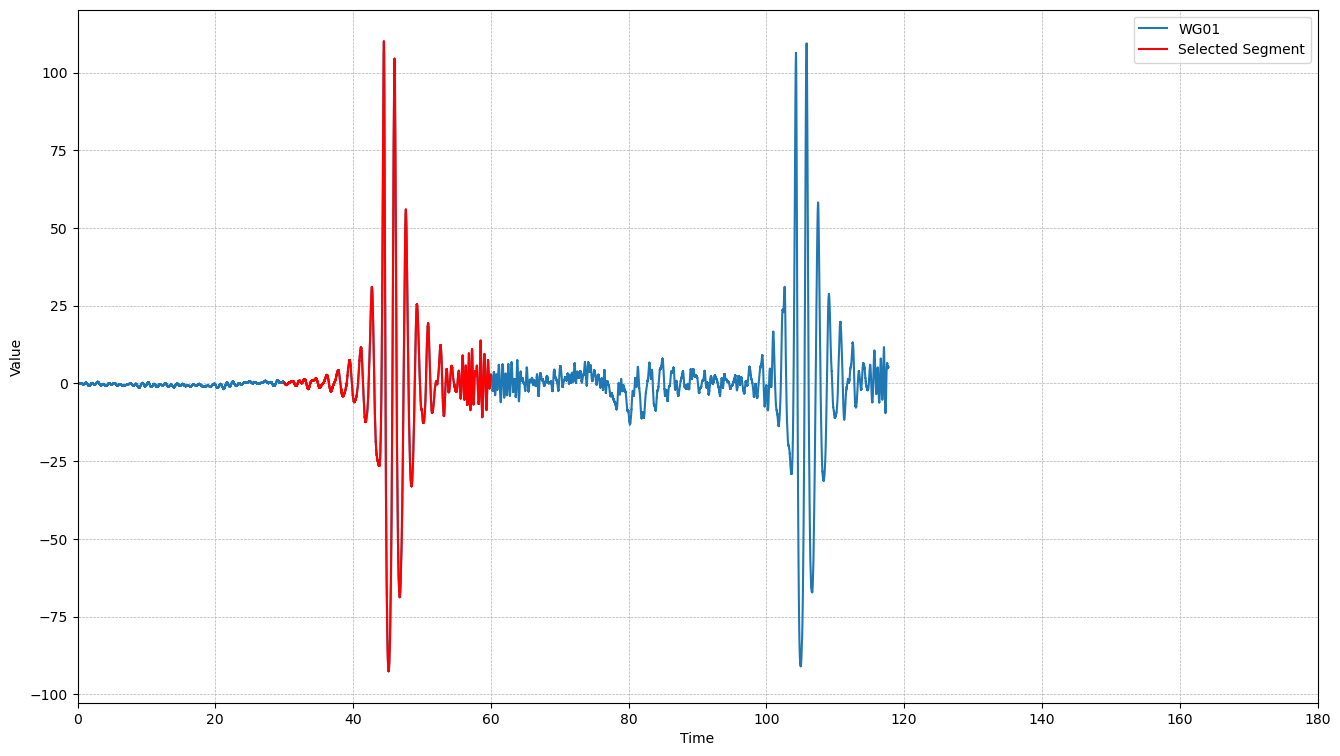

In [10]:
xmin = 0
xmax = 180

dsub = ds.sel(Time=slice(30, 60))

# Plot
plt.figure(figsize=(16,9))
# plt.plot(ds['Time'], ds['WG01'], linestyle='-', label="WG01")
ds['WG01'].plot(linestyle='-', label="WG01")
dsub['WG01'].plot(color='red', linestyle='-', label="Selected Segment")
plt.xlabel("Time")
plt.ylabel("Value")
# plt.yticks(range(0,150,2))
plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

pass

Sample Len = 60000
Least count Hz = 0.03333333333333333
Max Freq (Half band) Hz = 1000.0


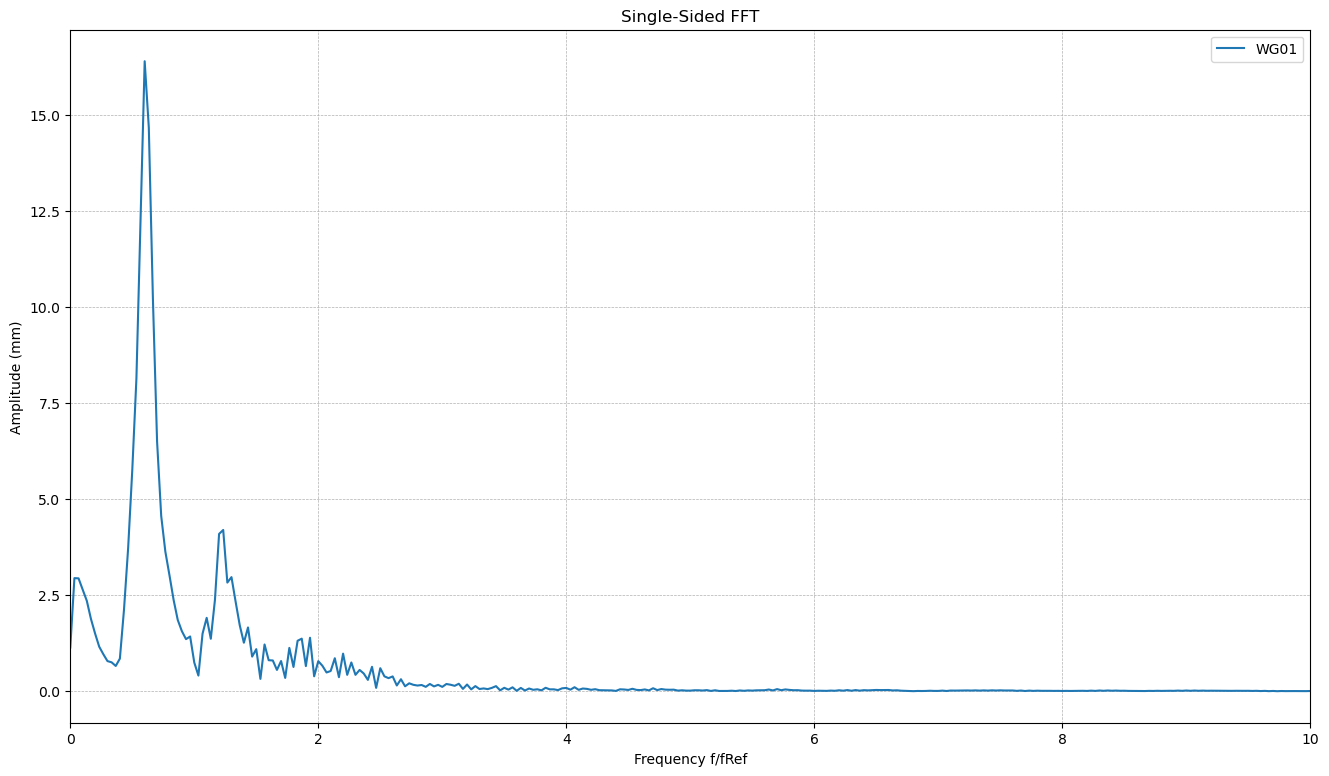

In [ ]:
# Plot spectrum
fig, ax = plt.subplots(figsize=(16,9))
xlim = (0, 10)
getSpec(dsub['WG01'], fSampling, ax, xlim, "WG01")

pass